In [56]:
## To widen the window
# from IPython.core.display import display, HTML
# display(HTML("<style>.container {width:100% } </style>"))

In [4]:
import networkx as nx
#from matplotlib import *
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
%matplotlib inline
import igraph as ig 
import numpy as np
import itertools as it


In [2]:
rootdir=os.getcwd()

dir_path = '/home/mseyednezhad/emojiPY/emojiNotebook/data'
emoi_all_info_file="all_emoji.csv"
data_dir='data/'
results_dir='results/'
dataset='organ'
# dataset='rioSports'
# dataset='rioTerms'
# dataset='wwc2015'
# dataset='g_20'
# dataset='randSamples'

lang_list = ['ar', 'de', 'en', 'es', 'fr', 'in', 'it', \
             'ja', 'ko', 'pl', 'pt', 'th', 'tl', 'tr']

dataset_list = ['organ', 'g_20','rioSports', 'rioTerms', 'wwc2015''randSamples']

lang_graph_file=rootdir+'/results/cultural_diff/lang_net/{}.graphml'.format(lang_list[0])

# graph_File_name=rootdir+'/data/emoji_graphml/'+ dataset+'.graphml'
giant_file_name=rootdir+'/data/emoji_graphml/'+ dataset+'_giant_latest.graphml.xml'
giant_file_name_rand=rootdir+'/data/emoji_graphml/'+ 'randSamples_giant_latest.graphml.xml'

print lang_graph_file

/Users/mehdimac/Documents/programs/emoji_notebook/emojiNotebook/results/cultural_diff/lang_net/ar.graphml


In [21]:
# Read the graphml
g=nx.read_graphml(lang_graph_file)

Calculate the pageRank

In [192]:
# calculate the pagerank
pr = nx.pagerank_numpy(g, alpha=0.9, weight='weight')
# weight = nx.get_edge_attributes(g,'weight')
## create the dataframe from dictionary
df_pr = pd.DataFrame.from_dict(pr, orient='index')
## change the name of the columns
df_pr.columns = [dataset+'_pr']

Calculate betweennness centrality

In [193]:
# betweennness centrality
bet = nx.betweenness_centrality(g, normalized=True, weight='weight', endpoints=False)
## turn the dictionary to dataframe
df_bet = pd.DataFrame.from_dict(bet, orient='index')
## change the name of the columns
df_bet.columns = [dataset+'_bet']

## Merge pagerank with betweenness (Just for the first time)
result = pd.concat([df_pr, df_bet], axis=1, join='inner')

Calculate the damn eigenvectors

In [194]:
## In-degrees eigenvector
eig_in = nx.eigenvector_centrality_numpy(g, weight='weight')
df_eig_in = pd.DataFrame.from_dict(eig_in, orient='index')
## change the name of the columns
df_eig_in.columns = [dataset+'_eig_in']

## Out-degree eigenvector be reversing the graph
eig_out = nx.eigenvector_centrality_numpy(g.reverse(), weight='weight')
df_eig_out = pd.DataFrame.from_dict(eig_out, orient='index')
## change the name of the columns
df_eig_out.columns = [dataset+'_eig_out']

Calculate weighted degree

In [195]:
deg = g.degree(weight='weight')
df_deg = pd.DataFrame.from_dict(deg, orient='index')
## change the name of the columns
df_deg.columns = [dataset+'_degree']
# deg_in = g.in_degree(weight='weight')
# deg_out = g.out_degree(weight='weight')

# Merge the fu.. Dataframes

In [196]:
## Merge dataframes
# result = pd.concat([df_pr, df_bet, df_eig_in, df_eig_out], axis=1, join='inner')
result = pd.concat([result, df_pr, df_bet, df_deg], axis=1, join='inner')

In [197]:
# result.drop(['organ_degree'], axis=1,inplace=True)
result.head(5)

,rioSports_pr,rioSports_bet,rioSports_degree,rioTerms_pr,rioTerms_bet,rioTerms_degree,wwc2015_pr,wwc2015_bet,wwc2015_degree,g_20_pr,g_20_bet,g_20_degree,randSamples_pr,randSamples_bet,randSamples_degree,organ_pr,organ_bet,organ_degree
n1007,0.000086,0.000000,58,0.000075,0.000028,162,0.000126,0.000197,624,0.000110,0.000000,0,0.000082,0.000355,5300,0.000498,0.000004,589
n2209,0.000097,0.000258,315,0.000087,0.000248,524,0.000111,0.000164,81,0.000128,0.000000,131,0.000074,0.000466,17427,0.000123,0.000000,0
n2208,0.000309,0.000071,1866,0.000115,0.000018,12149,0.000321,0.000250,4497,0.000228,0.000101,4954,0.007634,0.000381,2095596,0.000392,0.000000,1511
n2207,0.000374,0.000613,4858,0.000257,0.000280,10152,0.000862,0.000804,8372,0.000875,0.000311,5295,0.000372,0.000480,236880,0.000250,0.000526,293
n2206,0.000654,0.000946,4153,0.000476,0.000160,6999,0.000232,0.000009,5014,0.000324,0.000009,1456,0.000195,0.000579,81387,0.000159,0.000000,20


Saving the df file

In [198]:
# result.to_hdf('results/cultural_diff/temp.hdf', key='node_info', mode='w')

In [150]:
def corr_calculate(first, second):
        return first.corr(second, method="spearman") 

In [ ]:
degree_sequence=sorted(nx.degree(g).values(),reverse=True)
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

In [211]:
for data1 in dataset_list:
    for data2 in dataset_list:
        print '{} and {}: '.format(data1,data2),
        print corr_calculate(result[data1+'_degree'], result[data2+'_degree'])

organ and organ:  1.0
organ and g_20:  0.463823325897
organ and rioSports:  0.56590544327
organ and rioTerms:  0.501809801902
organ and wwc2015:  0.559765639168
organ and randSamples:  0.652678052889
g_20 and organ:  0.463823325897
g_20 and g_20:  1.0
g_20 and rioSports:  0.551511428473
g_20 and rioTerms:  0.451133335307
g_20 and wwc2015:  0.707698497536
g_20 and randSamples:  0.673517485515
rioSports and organ:  0.56590544327
rioSports and g_20:  0.551511428473
rioSports and rioSports:  1.0
rioSports and rioTerms:  0.854999659578
rioSports and wwc2015:  0.739468632289
rioSports and randSamples:  0.702168772944
rioTerms and organ:  0.501809801902
rioTerms and g_20:  0.451133335307
rioTerms and rioSports:  0.854999659578
rioTerms and rioTerms:  1.0
rioTerms and wwc2015:  0.677932872477
rioTerms and randSamples:  0.613696263468
wwc2015 and organ:  0.559765639168
wwc2015 and g_20:  0.707698497536
wwc2015 and rioSports:  0.739468632289
wwc2015 and rioTerms:  0.677932872477
wwc2015 and wwc2

In [13]:
## Calculating the rank correlation between languages
result = pd.read_hdf('results/cultural_diff/node_info.hdf', mode='r')
file_location ='results/cultural_diff/'
def corr_calculate(first, second):
    return first.corr(second, method="spearman") 

dataset_list = ['organ', 'g_20','rioSports', 'rioTerms', 'wwc2015', 'randSamples']

criteria = ['_pr', '_bet', '_degree']

data_cor_mat = np.zeros((len(dataset_list), len(dataset_list)), dtype = float)

for cri in criteria:
    for lang_tuple in it.combinations(dataset_list, 2):
        ## Set the diagonal
        data_cor_mat[dataset_list.index(lang_tuple[0])] [dataset_list.index(lang_tuple[0])] = 1
        ## calculate the rank correlation
        cor = corr_calculate(result[lang_tuple[0]+cri], result[lang_tuple[1]+cri])
        data_cor_mat[dataset_list.index(lang_tuple[0])][dataset_list.index(lang_tuple[1])] = cor
        data_cor_mat[dataset_list.index(lang_tuple[1])][dataset_list.index(lang_tuple[0])] = cor
        
    np.save(file_location+'lang_cor_{}.npy'.format(cri), data_cor_mat)

/Users/mehdimac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


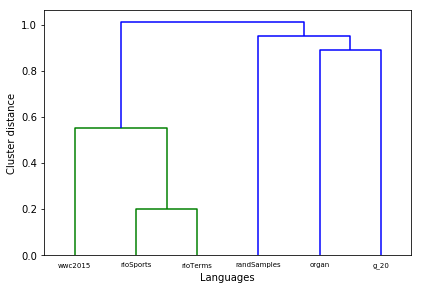

In [18]:
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as hierarchy

file_location ='results/cultural_diff/'

dataset_list = ['organ', 'g_20','rioSports', 'rioTerms', 'wwc2015', 'randSamples']

criteria = ['_pr', '_bet', '_degree']

# Methods = ['single', 'complete', 'average', 'weighted', 'centroid']
Methods = ['average']

for cri in criteria:

    corr_mat = np.load(file_location+'lang_cor_{}.npy'.format(cri))


    corr_mat = 1- corr_mat


    pdist = distance.squareform(distance.pdist(corr_mat, 'sqeuclidean'))


    for method in Methods:
        Z = hierarchy.linkage(pdist, method=method)
        R = hierarchy.inconsistent(Z, d=2)
        plt.clf()
        fig = plt.figure()
        ax = fig.add_axes([.1, .1, .85, .85])
        dd = hierarchy.dendrogram(Z, labels=dataset_list, leaf_font_size=7, ax=ax)
        ax.set_xlabel("Languages")
        ax.set_ylabel("Cluster distance")
        plt.savefig(file_location+'dend_data_{}_{}.pdf'.format(method, cri))

In [27]:
df_info = pd.read_hdf('data/all.hdf', mode='r')
df_info.head(100)
# american = result[''] == "USA"

,coordinate,countryCode,created_at,emoji_List,emoji_index_in_Net,emoji_position_in_text,hashtags,in_reply_to_user,sentiment,tweet_ID,tweet_Time,tweet_lang,user_ID,user_Location,user_mention,words
0,0,0,Sat Feb 20 12:22:31 +0000 2016,"[\U00002764, \U00002764]",[1171],"[112, 114]",[0],0,0.525000,701019095320420352,1455970951286,en,3.393506e+08,TX ✈️ IL,[],"[(first, 0), (day, 6), (since, 10), (years, 18..."
1,0,0,Sat Feb 20 12:40:16 +0000 2016,[\U0001F49E],[],[114],[0],0,-0.181250,701023563105472512,1455972016489,en,1.580986e+08,aus,[],"[(big, 8), (brothers, 12), (heart, 25), (birth..."
2,0,0,Sat Feb 20 12:52:43 +0000 2016,[\U0001F609],[],[58],[0],0,0.800000,701026696057622528,1455972763443,en,2.509437e+08,Singapore,[],"[(organ, 7), (donor, 13), (happy, 31), (give, ..."
3,0,0,Sat Feb 20 13:59:42 +0000 2016,[\U0001F601],[],[38],[0],0,0.000000,701043554114646019,1455976782717,en,1.016425e+09,"Branchville, South Carolina",[],"[(time, 0), (heart, 11), (transplant, 17)]"
4,0,0,Sat Feb 20 14:07:33 +0000 2016,"[\U0001F64F, \U0001F64F\U0001F3FB]","[1047, 960]","[26, 26]",[0],0,0.000000,701045529606750208,1455977253711,en,2.844745e+09,"Glasgow, Scotland",[],"[(became, 5), (organ, 15), (donor, 21)]"
5,0,0,Sat Feb 20 14:17:05 +0000 2016,"[\U0001F611, \U0001F611, \U0001F611]","[961, 774, 774]","[78, 79, 80]",[0],443084695,0.000000,701047928174067712,1455977825574,en,3.811737e+08,Bromsgrove,"[443084695, 376668771]","[(think, 30), (need, 38), (liver, 56), (transp..."
6,0,0,Sat Feb 20 15:36:09 +0000 2016,[\U00002665],[],[73],[0],0,0.000000,701067824610078721,1455982569254,in,4.891949e+09,CA,[],"[(rss, 32), (f4f, 69)]"
7,0,0,Sat Feb 20 15:47:42 +0000 2016,"[\U0001F64F, \U0001F64F, \U0001F493, \U0001F49...","[1309, 960, 960, 1172, 1174]","[44, 120, 119, 42, 43]",[0],2294787216,-0.125000,701070733921792000,1455983262888,en,2.294787e+09,0,[],"[(donate, 15), (small, 46), (big, 55), (amount..."
8,0,0,Sat Feb 20 15:52:29 +0000 2016,"[\U0001F602, \U0001F602]","[1809, 1048]","[0, 1]",[0],0,0.000000,701071935858352128,1455983549452,en,2.551113e+08,Huntsville ✈ T-Town,[],"[(ayyyyy, 3), (turn, 10)]"
9,0,0,Sat Feb 20 15:53:39 +0000 2016,[\U0000263A],[],[74],[0],0,0.800000,701072230977925120,1455983619814,en,4.111999e+09,kuala lumpur .,[2971014870],"[(organ, 24), (donor, 30), (id, 40), (happy, 4..."


In [30]:
df_loc = df_info['coordinate'] == '0'
len(df_loc)

1762604

# This creates a normalized mass density histogram in matplotlib

In [34]:
bins = np.linspace(-1, 1, 101)
# To get a normalized mass density histogram, we have to do it this way...
hist, bins = np.histogram(df['some_column'], bins=bins, density=True)
hist /= len(bins)
width = bins[1]-bins[0]
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([.15, .15, .75, .75])
plt.bar(left=bins[:-1], height=hist, width=width)

NameError: name 'df' is not defined

In [44]:
rootdir=os.getcwd()

dataset_list = ['organDonation', 'g_20','rioSports', 'rioTerms', 'wwc2015','randSamples']

file_name = '{}/data/{}.hdf'.format(rootdir, dataset_list[2])
df_count = pd.read_hdf(file_name, key='df_count' ,mode='r')
df_info = pd.read_hdf(file_name, key='df_info' ,mode='r')

In [55]:
df_count.sort_values(0, inplace=True, ascending=False)
df_300 = df_count.head(100)

,0
\U0001F44F,662312
\U0001F49A,412245
\U0001F49B,285800
\U0001F602,238952
\U0001F3C5,225781
\U0001F4AA,217302
\U0001F499,212866
\U00002764,209014
\U0001F1E7\U0001F1F7,159668
\U0001F60D,149335


In [46]:
df_info.head(5)

,coordinate,countryCode,created_at,emoji_List,emoji_index_in_Net,emoji_position_in_text,hashtags,in_reply_to_user,sentiment,tweet_ID,tweet_Time,tweet_lang,user_ID,user_Location,user_mention,words
0,0,0,Sun Aug 14 15:51:43 +0000 2016,"[\U0001F1E7\U0001F1F7, \U0001F1F2\U0001F1EA]","[1667, 31]","[41, 46]","{handebol, EuSouTimeBrasil, TimeBrasil}",0,0.000,764852006301364224,1471189903222,pt,3.170682e+09,0,[25363613],"[(h30, 20), (timebrasil, 29), (montenegro, 49)..."
1,0,0,Sun Aug 14 15:51:46 +0000 2016,[\U0001F44A],[],[36],{Hockey},4630979361,0.200,764852021509943296,1471189906848,en,1.277554e+08,India,[4630979361],"[(absolutely, 11), (bring, 23), (hockey, 38)]"
2,0,0,Sun Aug 14 15:51:55 +0000 2016,[\U0001F3BE],[],[120],"{tennis, Rio2016, PUR}",0,0.525,764852059564802048,1471189915921,en,9.808588e+07,Puerto Rico,[52422878],"[(feeling, 19), (get, 31), (win, 44), (first, ..."
3,0,0,Sun Aug 14 15:51:56 +0000 2016,[\U00002764],[],[82],{NadoSincronizado},0,0.000,764852064044326912,1471189916989,es,3.619494e+08,0,[],"[(austriacas, 4), (deber, 15), (ganar, 24), (h..."
4,0,0,Sun Aug 14 15:56:08 +0000 2016,"[\U0001F44A, \U0001F44A]","[1171, 906]","[41, 42]","{Boxe, SomosTodosOlímpicos, Rio2016}",0,0.000,764853120849551360,1471190168951,pt,2.549420e+09,"Jandira, Brasil",[18219976],"[(brasileiro, 19), (ringue, 33), (boxe, 44), (..."
